### Installing the NetworkX, Numpy and Matplotlib libraries 

In [211]:
#pip install networkx
#pip install matplotlib
#pip install numpy

### Importing the Networkx, Numpy and Matplotlib libraries

In [212]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Generating a random graph according to the Barabási–Albert preferential Attachment model.

A graph of n nodes is grown by attaching new nodes each with m Edges that are preferentially attached to existing nodes with high degree.

### Assign network parameters (m>=1 and m < n)

In [213]:
n = 50
m = 2

Where,
- n is the Number of nodes which is an integer value
- m is the Number of edges to attach from a new node to existing nodes
- G is the generated BA preferential attachment model Graph[3].

### Variables to be used

In [214]:
# Stores the number of nodes
n_row = n
# Stores the number of edges
n_edges = m
# initialize graph
G = nx.Graph()
G2 = nx.Graph()

### Barabasi Albert Model (Growth Phase + Preferential Attachment)

Limits is a list that stores floats between 0 and 1 which defines the probabaility range for each node to be chosen as a neighbor depending on its degree for ex: if limits[0] = 0 and limits[1] = 0.1 then the probability of choosing node 0 as a neighbors is 0.1 - 0

In [215]:
def barabasi_albert_graph(n, m, seed=None):
    # Add m initial nodes (m0 in barabasi-speak)
    G=empty_graph(m)
    G.name="barabasi_albert_graph(%s,%s)"%(n,m)
    # Target nodes for new edges
    targets=list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.
    source=m
    while source<n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip(*m,targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend(*m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = _random_subset(repeated_nodes,m)
        source += 1
    return G

### Create Barabasi-Albert scale free graph

In [216]:
# Create the network graph
G= nx.barabasi_albert_graph(n,m)
# Get all the node positions of the graph
node_pos = nx.spring_layout(G) 

### Network plots

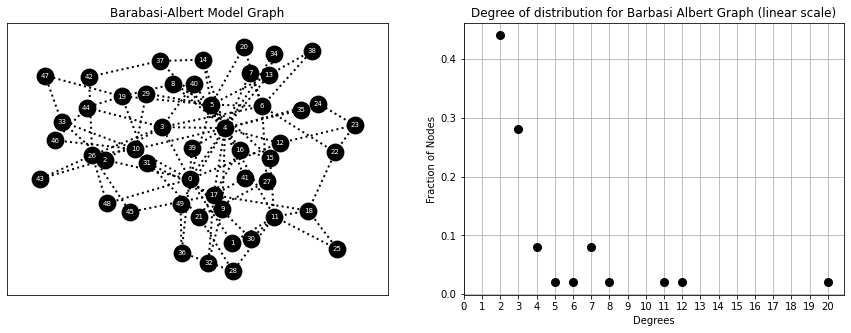

In [217]:
fig1 = plt.figure(figsize=(15, 5))
plt.clf()
plt.subplot(1,2,1)
plt.title('Barabasi-Albert Model Graph')
nx.draw_networkx_nodes(G, node_pos, node_color='#000000', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=7, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')

plt.subplot(1,2,2)
# Create a dictionary containing all the nodes and its edge connection
degrees = dict(G.degree())
# To get the degree of distribution values
degree_values = sorted(set(degrees.values()))
node_portion = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
# Plot the graph
plt.title('Degree of distribution for Barbasi Albert Graph (linear scale)')
plt.plot(degree_values, node_portion, linewidth=0, color='#000000', marker= 'o', markersize = 8)
plt.ylabel('Fraction of Nodes')
plt.xlabel('Degrees')
plt.xticks(np.arange(0, degree_values[len(degree_values)-1] + 1, 1))
plt.grid()


fig1.savefig("Network_plot_n" + str(n_row) + "_m" + str(m) + ".png")

### Finding the network size

In [218]:
print('Number of nodes in the graph', nx.number_of_nodes(G))

Number of nodes in the graph 50


### Finding number of edges in the graph

In [219]:
print('Number of edges in the graph', nx.number_of_edges(G))

Number of edges in the graph 96


### Removing a Node from the network (Betweenness)

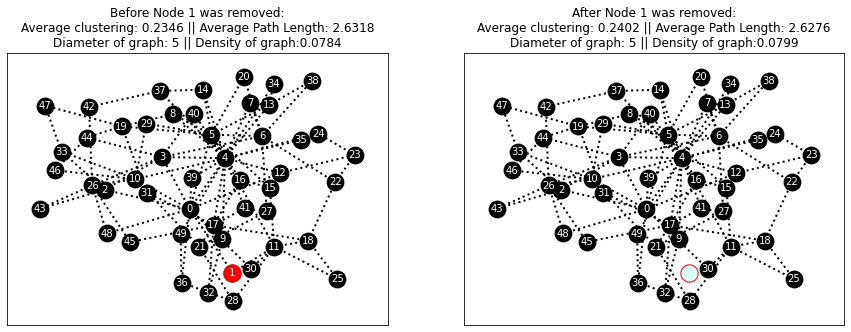

In [220]:
G2 = G
# Enter node id to be removed
node_id = 1

fig2 = plt.figure(figsize=(15, 5))
plt.clf()
plt.subplot(1, 2, 1)
plt.title('Before Node ' + str(node_id) + ' was removed:' + '\n' 
          + 'Average clustering: ' + str(round(nx.average_clustering(G), 4)) + ' || ' 
          + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G), 4)) + '\n' 
          + 'Diameter of graph: ' + str(nx.diameter(G)) + ' || ' 
          + 'Density of graph:' + str(round(nx.density(G2), 4)))
nx.draw_networkx_nodes(G, node_pos, node_color='#000000', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[node_id], node_color="r")
before = list(G.edges)
G2.remove_node(node_id)
after = list(G2.edges)
plt.subplot(1, 2, 2)
plt.title('After Node ' + str(node_id) + ' was removed:' + '\n' 
          + 'Average clustering: ' + str(round(nx.average_clustering(G2), 4)) + ' || ' 
          + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G2), 4)) + '\n' 
          + 'Diameter of graph: ' + str(nx.diameter(G2)) + ' || ' 
          + 'Density of graph:' + str(round(nx.density(G2), 4)))

nx.draw_networkx_nodes(G2, node_pos, node_color='#000000', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G2, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G2, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G2,node_pos, nodelist=[node_id], edgecolors="r", node_color="#D9FFFFFF")

fig2.savefig("Network_betweenness_n" + str(n_row) + "_m" + str(m) + ".png")

### Degree centrality

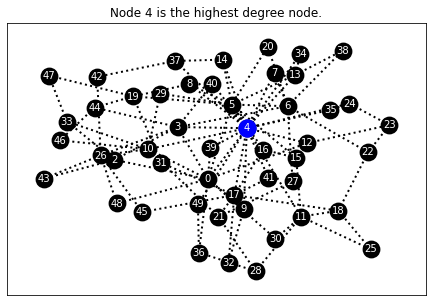

In [221]:
all_centr = dict(nx.degree_centrality(G))
keys_values = [key for key in all_centr.keys()]
obj_values = [all_centr[key] for key in keys_values]
highest_degr = keys_values[np.argmax(np.array(obj_values))]
fig3 = plt.figure(figsize=(7.5, 5))
plt.clf()
nx.draw_networkx_nodes(G, node_pos, node_color='#000000', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[highest_degr], node_color="b")
plt.title('Node ' + str(highest_degr) + ' is the highest degree node.')
fig3.savefig("Higest_Degree_node_" + str(n_row) + "_m" + str(m) + ".png")

### Finding the graphs density

In [222]:
print('Density of graph:', nx.density(G))

Density of graph: 0.07993197278911565


### Raduis and diameter of the graph

In [223]:
print('Diameter of the graph: ' + str(nx.diameter(G)) + ', Raduis of graph: ' + str(nx.radius(G, e=None)))

Diameter of the graph: 5, Raduis of graph: 3


### Eccentrity

In [224]:
# eccentrity of node 2 & 5
print(dict(nx.eccentricity(G, v=[2, 5])))

{2: 4, 5: 3}


### Betweenness centrality

In [225]:
print(nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None))

{0: 0.1525833947376501, 2: 0.030637875717662938, 3: 0.09485655695762078, 4: 0.4419478152855812, 5: 0.156657571152252, 6: 0.08056838010295456, 7: 0.004829545454545454, 8: 0.008761820330969266, 9: 0.01659681925639372, 10: 0.11804429809748962, 11: 0.07899326343475283, 12: 0.02131676440187079, 13: 0.024903608015310146, 14: 0.0042479314420803774, 15: 0.0065085697399527185, 16: 0.006995486782720825, 17: 0.12319976615189383, 18: 0.024512539273177574, 19: 0.045295086119554205, 20: 0.0, 21: 0.03537835293154442, 22: 0.016949190486424535, 23: 0.0066711952350250224, 24: 0.012760360699190483, 25: 0.0, 26: 0.05575924518743668, 27: 0.005803955205550951, 28: 0.00982565011820331, 29: 0.0029983535967578524, 30: 0.0033540189125295505, 31: 0.009515366430260047, 32: 0.0022476538433985243, 33: 0.017686170212765955, 34: 0.0, 35: 0.0, 36: 0.00907210401891253, 37: 0.022650709219858154, 38: 0.0017322413599009344, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0031028368794326243, 43: 0.0013297872340425532, 44: 0.011820330969

### Closeness centrality

In [226]:
print(nx.closeness_centrality(G, u=None, distance=None, wf_improved=True))

{0: 0.5106382978723404, 2: 0.384, 3: 0.48, 4: 0.6, 5: 0.4948453608247423, 6: 0.41739130434782606, 7: 0.40336134453781514, 8: 0.4247787610619469, 9: 0.40336134453781514, 10: 0.47058823529411764, 11: 0.43243243243243246, 12: 0.41025641025641024, 13: 0.42105263157894735, 14: 0.41739130434782606, 15: 0.36923076923076925, 16: 0.3779527559055118, 17: 0.46601941747572817, 18: 0.3609022556390977, 19: 0.38095238095238093, 20: 0.3582089552238806, 21: 0.39344262295081966, 22: 0.34285714285714286, 23: 0.32, 24: 0.39344262295081966, 25: 0.32, 26: 0.3902439024390244, 27: 0.3310344827586207, 28: 0.35294117647058826, 29: 0.36923076923076925, 30: 0.36363636363636365, 31: 0.35036496350364965, 32: 0.3356643356643357, 33: 0.34782608695652173, 34: 0.384, 35: 0.3870967741935484, 36: 0.36363636363636365, 37: 0.39344262295081966, 38: 0.3310344827586207, 39: 0.39669421487603307, 40: 0.40336134453781514, 41: 0.4067796610169492, 42: 0.3221476510067114, 43: 0.3057324840764331, 44: 0.36363636363636365, 45: 0.35820

### Edgebetweenness

In [227]:
print(nx.edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None))

{(0, 2): 0.038344266277939736, (0, 3): 0.02041666053145645, (0, 4): 0.03907312925170067, (0, 5): 0.04918650180129772, (0, 9): 0.020426200783343642, (0, 10): 0.027479821293596798, (0, 12): 0.022747979061754565, (0, 30): 0.031859410430839, (0, 36): 0.03592687074829932, (0, 39): 0.013470804988662129, (0, 48): 0.03459568351149984, (2, 3): 0.024248866213151934, (2, 33): 0.014846533851635889, (2, 43): 0.022151360544217683, (3, 4): 0.04924085976381892, (3, 6): 0.046347065160840674, (3, 26): 0.03455924036281179, (3, 40): 0.011536281179138323, (3, 44): 0.03643707482993197, (4, 5): 0.051530704273051196, (4, 7): 0.03687448464234178, (4, 8): 0.03487811791383219, (4, 9): 0.0333032708032708, (4, 10): 0.07309955728323074, (4, 11): 0.08259910205063266, (4, 12): 0.03586953720882291, (4, 13): 0.042984693877551015, (4, 14): 0.02607709750566893, (4, 17): 0.0781133124245369, (4, 24): 0.047741230330516034, (4, 34): 0.0361468793866753, (4, 35): 0.03826530612244898, (4, 37): 0.0529407596371882, (4, 39): 0.027

### Transitivity

In [228]:
print(nx.transitivity(G))

0.11003861003861004


### Finding a node neighbors and non neighbors

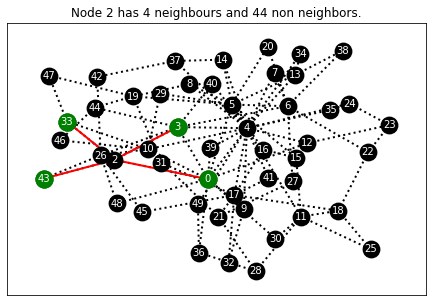

In [229]:
node_id = 2
#https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html
dict_value = nx.all_neighbors(G, node_id)
list_value = [item for item in dict_value]
# Non neighbors
dict_value_non = nx.non_neighbors(G, node_id)
list_value_non = [item for item in dict_value_non]
# get the links
new_edges = []
for n in list_value:
    new_edges.append([n, node_id])
                      
if len(new_edges) > 0:
    fig4 = plt.figure(figsize=(7.5, 5))
    plt.clf()
    nx.draw_networkx_nodes(G, node_pos, node_color='#000000', node_size=250, linewidths=2.0)
    nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
    nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
    nx.draw_networkx_nodes(G,node_pos, nodelist=list_value, node_color="g")
    nx.draw_networkx_edges(G, node_pos, edgelist = new_edges, width=2.0, edge_color='r')
    plt.title('Node ' + str(node_id) + ' has ' + str(len(list_value)) + ' neighbours and ' 
              + str(len(list_value_non)) + ' non neighbors.')
    fig4.savefig(str(node_id) + "_Neighbours_n" + str(n_row) + "_m" + str(m) + ".png")

### Finding the common neighbors for two nodes

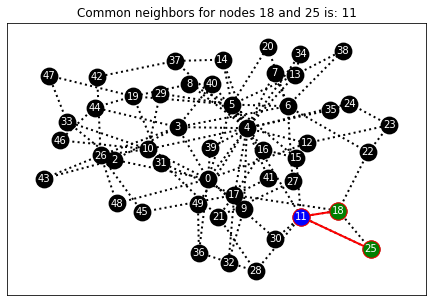

In [230]:
first_node = 18
second_node = 25

common = nx.common_neighbors(G, first_node, second_node)
common_list = [item for item in common]
# get the links
new_edges = []
for n in common_list:
    new_edges.append([first_node, n])
    new_edges.append([second_node, n])
    
fig7 = plt.figure(figsize=(7.5, 5))
plt.clf()
nx.draw_networkx_nodes(G, node_pos, node_color='#000000', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[first_node], edgecolors="r", node_color="g")
nx.draw_networkx_nodes(G,node_pos, nodelist=[second_node], edgecolors="r", node_color="g")
nx.draw_networkx_nodes(G,node_pos, nodelist=common_list, edgecolors="r", node_color="b")
nx.draw_networkx_edges(G, node_pos, edgelist = new_edges, width=2.0, edge_color='r')
if len(common_list) > 0:
    plt.title('Common neighbors for nodes ' + str(first_node) + ' and ' + str(second_node) + 
              ' is: ' + ', '.join(str(e) for e in common_list))
else:
    plt.title('Common neighbors for nodes ' + str(first_node) + ' and ' + str(second_node) + 
              ' is: ' + 'None')
fig7.savefig(str(first_node) + '_' + str(second_node) + "Common_Neighbours_n" + str(n_row) + "_m" + str(m) + ".png")

### Size of the network

In [231]:
# Get the number of nodes 
nodes = float(nx.number_of_nodes(G))
print('Total number of nodes on the graph:', nodes)

Total number of nodes on the graph: 49.0


### Network Nodes Characteristics

In [232]:
# Create a dictionary containing all the nodes and its edge connection
degrees = dict(G.degree())
# Get the dictionary keys
dict_keys = list(degrees.keys())
# Get the dictionary objects
dict_objs = [degrees[key] for key in degrees.keys()]

new_array = np.array(dict_objs)
max_index = np.argmax(new_array)

print('Nodes and the number of edges made to an existing Node in the network:', '\n')
print('Node ID:','\n', dict_keys, '\n')
print('Number of Edges:','\n', dict_objs, '\n')
print('Node', dict_keys[max_index], 'has the higest number of connected edges of value',new_array[max_index])

Nodes and the number of edges made to an existing Node in the network: 

Node ID: 
 [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] 

Number of Edges: 
 [11, 4, 7, 20, 11, 7, 2, 3, 3, 7, 6, 3, 4, 3, 3, 3, 8, 4, 5, 2, 4, 3, 3, 3, 2, 6, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2] 

Node 4 has the higest number of connected edges of value 20


### Adjacency matrix

In [233]:
# https://www.slideshare.net/rik0/complex-and-social-network-analysis-in-python/9-Average_geodesic_distance_i_n
# Get the matrix values
A = nx.to_numpy_matrix(G)
A

matrix([[0., 1., 1., ..., 0., 1., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Computting for the Shortest Path between two nodes

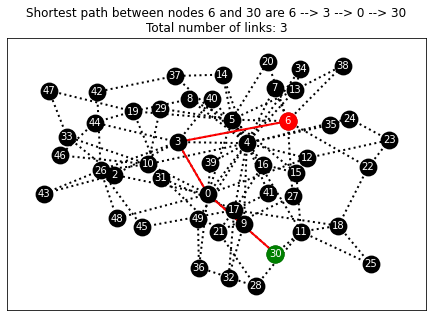

In [234]:
# https://stackoverflow.com/questions/57683321/edge-attributes-of-shortest-path-using-networkx
#Enter start node
st = 6 
#Enter end node
end = 30 
# Gets the shortest between two nodes
path = nx.shortest_path(G)   
# Get a list of all the edges in the graph
path_edges = [list(u) for u in G.edges(data=False)]
# Creates the new edges list
n_edges = []
# Shortest path nodes
s_path = path[st][end]
# Convert shortest path list to string seperating each value with #
new_string = '#'.join(str(x) for x in s_path)
new_val = new_string
new_val2 = new_string[::-1]
# Get all the edge list between nodes
for i in range(len(path_edges)):
    n_path = path_edges[i]
    # Convert graph edges list to string seperating each value with #
    n_string = '#'.join(str(x) for x in n_path)
    # Check if the graph edges value is equal to shortest path values
    if  any(n_string.split('#')[1] == c for c in new_val.split('#')): 
        if any(n_string.split('#')[0] == c for c in new_val.split('#')):
            n_edges.append(n_path)

# Check if number of edges > 0
if len(n_edges) > 0:
    fig5 = plt.figure(figsize=(7.5, 5))
    plt.clf()
    nx.draw_networkx_nodes(G, node_pos, node_color='#000000', node_size=250, linewidths=2.0)
    nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
    nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
    nx.draw_networkx_nodes(G,node_pos, nodelist=[st], node_color="r")
    nx.draw_networkx_nodes(G,node_pos, nodelist=[end], node_color="g")
    nx.draw_networkx_edges(G, node_pos, edgelist = n_edges, width=2.0, edge_color='r')
    # Check if the nodes is greater that 2
    if len(path[st][end]) > 2:
        plt.title('Shortest path between nodes ' + str(st) + ' and ' + str(end) 
                  + ' are ' + ' --> '.join(str(e) for e in (path[st][end])) 
                  + '\n' + 'Total number of links: ' + str(len(n_edges)))
    else:
        plt.title('Shortest path between nodes: No path found!' + '\n' + 'Total number of links: ' + str(len(n_edges)))
    fig5.savefig(str(st) + 's_' + str(end) +"e_ShortestPath_n" + str(n_row) + "_m" + str(m) + ".png")

### Average path length

In [235]:
average_shortest_path = nx.average_shortest_path_length(G)
print('Average length of shortest path:', average_shortest_path)

Average length of shortest path: 2.627551020408163


### Degree of Distribution for each Node in the Network

<Figure size 432x288 with 0 Axes>

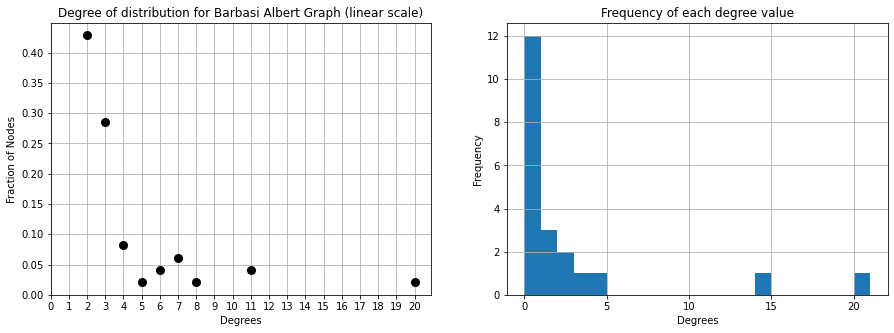

In [236]:
# To get the degree of distribution values
degree_values = sorted(set(degrees.values()))
# Get the number of unique connections made in the Network
for i in range(len(degree_values)):
    unique_connections = list(degrees.values()).count(degree_values[i]) 
    #print('Degree', degree_values[i], ': has', unique_connections, 'portion of Nodes in the Network.', '\n' )
    
node_portion = [list(degrees.values()).count(i)/float(nodes) for i in degree_values]
#print('Fraction of Nodes:', node_portion, '\n')
plt.clf()
fig6 = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
# Plot the graph
plt.title('Degree of distribution for Barbasi Albert Graph (linear scale)')
plt.plot(degree_values, node_portion, linewidth=0, color='#000000', marker= 'o', markersize = 8)
plt.ylabel('Fraction of Nodes')
plt.xlabel('Degrees')
plt.xticks(np.arange(0, degree_values[len(degree_values)-1] + 1, 1))
plt.grid()
# Plot the frequency of each degree value
d1 = nx.degree_histogram(G)
plt.subplot(1,2,2)
plt.title('Frequency of each degree value')
plt.hist(d1, bins=len(d1))
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.grid()
plt.show()
fig6.savefig("DegreeDist_n" + str(n_row) + "_m" + str(m) + ".png")
#print('Frequency:', d1)

### Clustering and Clustering Coefficient

In [237]:
print(nx.clustering(G))

{0: 0.12727272727272726, 2: 0.16666666666666666, 3: 0.14285714285714285, 4: 0.07368421052631578, 5: 0.12727272727272726, 6: 0.047619047619047616, 7: 0, 8: 0.6666666666666666, 9: 0.3333333333333333, 10: 0.047619047619047616, 11: 0.06666666666666667, 12: 0.3333333333333333, 13: 0.3333333333333333, 14: 0.6666666666666666, 15: 0.3333333333333333, 16: 0.3333333333333333, 17: 0.03571428571428571, 18: 0.16666666666666666, 19: 0.1, 20: 1.0, 21: 0, 22: 0, 23: 0, 24: 0.3333333333333333, 25: 1.0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 1.0, 35: 1.0, 36: 0, 37: 0.3333333333333333, 38: 0, 39: 1.0, 40: 1.0, 41: 1.0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0}


In [238]:
# Clustering coefficient
print('Average clustering:', '\n', nx.average_clustering(G))

Average clustering: 
 0.24017767052138697


### List of Connected Nodes

In [239]:
a = list(nx.connected_components(G))
print('List of connected components:', '\n', a)

List of connected components: 
 [{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}]


## Number of node neighbours in the network

In [240]:
print('Node positions:', '\n', node_pos)

Node positions: 
 {0: array([-0.08029767, -0.2055506 ]), 1: array([ 0.18332365, -0.62065776]), 2: array([-0.60415306, -0.0793216 ]), 3: array([-0.24985429,  0.13455593]), 4: array([0.1376311 , 0.12705153]), 5: array([0.0536232 , 0.28111579]), 6: array([0.36523709, 0.27056375]), 7: array([0.29329234, 0.48978475]), 8: array([-0.18396961,  0.4140052 ]), 9: array([ 0.1209758 , -0.39914187]), 10: array([-0.41465654, -0.00972031]), 11: array([ 0.44066728, -0.45007465]), 12: array([0.47422149, 0.02997345]), 13: array([0.40885914, 0.47513416]), 14: array([0.00220741, 0.57450259]), 15: array([ 0.41370357, -0.0666002 ]), 16: array([ 0.22911238, -0.01216153]), 17: array([ 0.06727442, -0.30929514]), 18: array([ 0.64981283, -0.41131587]), 19: array([-0.49820051,  0.33501322]), 20: array([0.25462779, 0.65951865]), 21: array([-0.02116249, -0.45060366]), 22: array([ 0.8158766 , -0.02997016]), 23: array([0.93512656, 0.14726912]), 24: array([0.71122675, 0.2880633 ]), 25: array([ 0.82949477, -0.66253003]

### References

[1]https://networkx.org/

[2]https://www.tutorialspoint.com/python_data_science/python_matplotlib.htm

[3]https://www.geeksforgeeks.org/barabasi-albert-graph-scale-free-models/

[4]https://hal.archives-ouvertes.fr/hal-00940688/document